# Phonon Polaritons in Hexagonal Boron Nitride (hBN)

This notebook explores the fascinating physics of phonon polaritons in hexagonal boron nitride (hBN), a 2D material with unique optical properties.

## What are Phonon Polaritons?

Phonon polaritons are hybrid light-matter quasiparticles that arise from the strong coupling between electromagnetic waves and optical phonons in polar materials. In hBN, these excitations occur in the mid-infrared spectral range and exhibit extreme field confinement.


## Key Properties of hBN

- **Crystal Structure**: Hexagonal lattice with alternating B and N atoms
- **Optical Phonons**: Two main branches - in-plane (TO) and out-of-plane (ZO)
- **Reststrahlen Bands**: Frequency ranges where the material behaves as a metal
- **Hyperbolic Dispersion**: Different optical properties along different crystal axes


In [ ]:
using LinearAlgebra
using Plots
using Roots
using Printf

# Set up plotting parameters
#default(fontfamily="Computer Modern Unicode", size=(800, 600))

println("Libraries imported successfully!")
println("Ready to explore phonon polaritons in hBN")


Libraries imported successfully!
Ready to explore phonon polaritons in hBN


## Dielectric Function of hBN

The dielectric function of hBN can be described using a Lorentz oscillator model:

$$\varepsilon(\omega) = \varepsilon_{\infty} \left(1 + \frac{\omega_{TO}^2 - \omega_{LO}^2}{\omega_{TO}^2 - \omega^2 - i\gamma\omega}\right)$$

Where:
- $\varepsilon_{\infty}$ is the high-frequency dielectric constant
- $\omega_{TO}$ and $\omega_{LO}$ are the transverse and longitudinal optical phonon frequencies
- $\gamma$ is the damping parameter


In [2]:
# hBN material parameters (in-plane)
ε_inf = 4.9  # High-frequency dielectric constant
ω_TO = 1367  # TO phonon frequency (cm^-1)
ω_LO = 1610  # LO phonon frequency (cm^-1)
γ = 5  # Damping parameter (cm^-1)

# Frequency range for calculations
ω = range(1200, 1700, length=1000)  # cm^-1

function dielectric_function(ω, ε_inf, ω_TO, ω_LO, γ)
    """Calculate the dielectric function of hBN"""
    numerator = ω_TO^2 - ω_LO^2
    denominator = ω_TO^2 - ω^2 - im * γ * ω
    return ε_inf * (1 + numerator / denominator)
end

# Calculate dielectric function
ε = dielectric_function.(ω, ε_inf, ω_TO, ω_LO, γ)

println("hBN parameters:")
println("TO frequency: $(ω_TO) cm⁻¹")
println("LO frequency: $(ω_LO) cm⁻¹")
println("High-frequency ε: $(ε_inf)")


hBN parameters:
TO frequency: 1367 cm⁻¹
LO frequency: 1610 cm⁻¹
High-frequency ε: 4.9



Reststrahlen band: 1200.0 - 1366.6666666666667 cm⁻¹


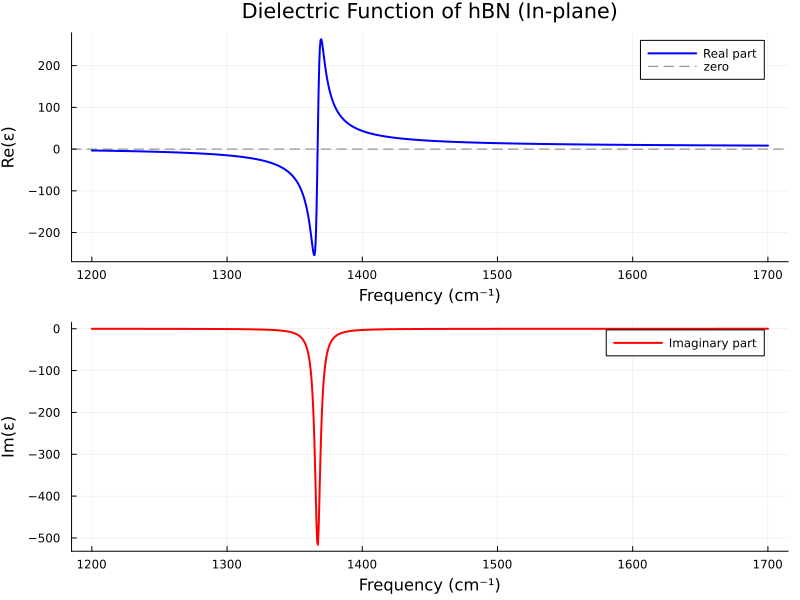

In [12]:
# Plot the dielectric function
p1 = plot(ω, real.(ε), 
          linewidth=2, 
          label="Real part",
          color=:blue,
          xlabel="Frequency (cm⁻¹)",
          ylabel="Re(ε)",
          title="Dielectric Function of hBN (In-plane)",
          grid=true,
          legend=:topright)

hline!(p1, [0], color=:black, linestyle=:dash, alpha=0.5,label="zero")

p2 = plot(ω, imag.(ε), 
          linewidth=2, 
          label="Imaginary part",
          color=:red,
          xlabel="Frequency (cm⁻¹)",
          ylabel="Im(ε)",
          grid=true,
          legend=:topright)


plot(p1, p2, layout=(2,1), size=(800, 600))

# Find Reststrahlen band (where Re(ε) < 0)
reststrahlen_mask = real.(ε) .< 0
if any(reststrahlen_mask)
    reststrahlen_freqs = ω[reststrahlen_mask]
    println("\nReststrahlen band: $(reststrahlen_freqs[1]) - $(reststrahlen_freqs[end]) cm⁻¹")
end


plot!()


## Phonon Polariton Dispersion

The dispersion relation for phonon polaritons in a thin hBN film can be derived from Maxwell's equations:

$$k = \frac{\omega}{c} \sqrt{\frac{\varepsilon(\omega)}{\varepsilon(\omega) + 1}}$$

This gives us the relationship between frequency and wavevector for the polariton modes.


In [8]:
# Calculate phonon polariton dispersion
c = 3e10  # Speed of light in cm/s

function polariton_dispersion(ω, ε)
    """Calculate the polariton wavevector"""
    # Avoid division by zero and negative values under square root
    ratio = ε ./ (ε .+ 1)
    # Only calculate for positive real part
    valid_mask = real.(ratio) .> 0
    k = zeros(ComplexF64, length(ω))
    k[valid_mask] = (ω[valid_mask] ./ c) .* sqrt.(ratio[valid_mask])
    return k
end

# Calculate dispersion
k_polariton = polariton_dispersion(ω, ε)

# Light line (k = ω/c)
k_light = ω ./ c

println("Phonon polariton dispersion calculated!")


Phonon polariton dispersion calculated!


┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\sbatlle\.julia\packages\Plots\xKhUG\src\args.jl:1590


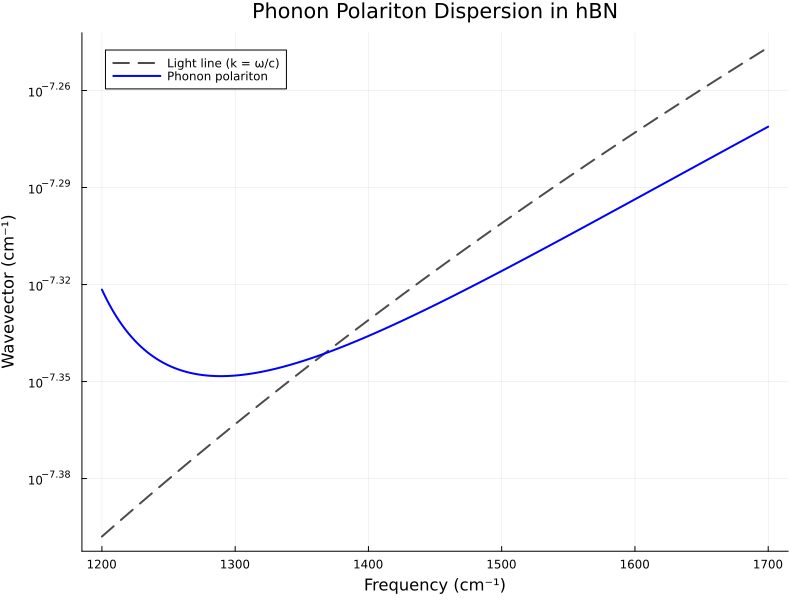

In [9]:
# Plot the dispersion relation
valid_mask = real.(k_polariton) .> 0

plot(ω, k_light, 
     linewidth=2, 
     linestyle=:dash, 
     color=:black, 
     label="Light line (k = ω/c)", 
     alpha=0.7,
     xlabel="Frequency (cm⁻¹)",
     ylabel="Wavevector (cm⁻¹)",
     title="Phonon Polariton Dispersion in hBN",
     grid=true,
     yscale=:log,
     size=(800, 600))

plot!(ω[valid_mask], real.(k_polariton[valid_mask]), 
      linewidth=2, 
      color=:blue, 
      label="Phonon polariton")

# Add annotations
annotate!(ω_TO, 0.1, text("TO phonon", 10, :red))
annotate!(ω_LO, 0.1, text("LO phonon", 10, :red))

plot!()


## Field Confinement and Enhancement

One of the most remarkable properties of phonon polaritons is their ability to confine electromagnetic fields to subwavelength dimensions. The confinement factor can be calculated as:

$$\text{Confinement} = \frac{\lambda_0}{\lambda_{eff}} = \frac{k}{k_0}$$

Where $\lambda_0$ is the free-space wavelength and $\lambda_{eff}$ is the effective wavelength of the polariton.


Maximum confinement: 1.2x at 1200.0 cm⁻¹


┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\sbatlle\.julia\packages\Plots\xKhUG\src\args.jl:1590


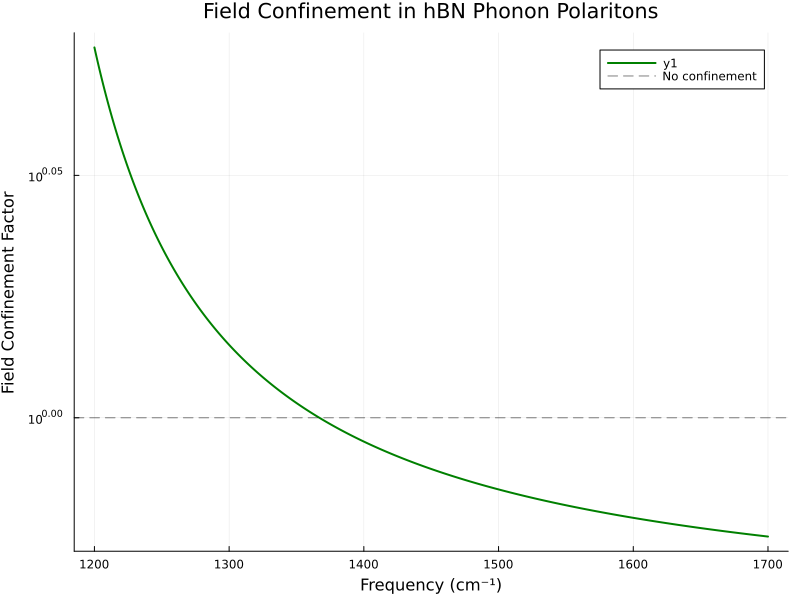

In [11]:
# Calculate field confinement
k0 = ω ./ c  # Free-space wavevector
confinement = abs.(k_polariton ./ k0)

# Plot confinement factor
valid_mask = real.(k_polariton) .> 0
plot(ω[valid_mask], confinement[valid_mask], 
     linewidth=2, 
     color=:green,
     xlabel="Frequency (cm⁻¹)",
     ylabel="Field Confinement Factor",
     title="Field Confinement in hBN Phonon Polaritons",
     grid=true,
     yscale=:log,
     size=(800, 600))

# Add horizontal line at confinement = 1
hline!([1], color=:black, linestyle=:dash, alpha=0.5, label="No confinement")


# Find maximum confinement
max_confinement_idx = argmax(confinement[valid_mask])
max_confinement_freq = ω[valid_mask][max_confinement_idx]
max_confinement_value = confinement[valid_mask][max_confinement_idx]

println("Maximum confinement: $(round(max_confinement_value, digits=1))x at $(round(max_confinement_freq, digits=1)) cm⁻¹")

plot!()


## Applications and Future Directions

Phonon polaritons in hBN have numerous applications:

1. **Subwavelength Imaging**: Breaking the diffraction limit in the mid-infrared
2. **Enhanced Spectroscopy**: Boosting molecular vibrational signals
3. **Thermal Management**: Controlling heat transfer at the nanoscale
4. **Quantum Technologies**: Potential for quantum information processing
5. **Chemical Sensing**: Ultra-sensitive detection of molecular vibrations

### Key Advantages:
- **Low Losses**: hBN has relatively low optical losses
- **Tunability**: Properties can be modified by thickness and environment
- **Compatibility**: Works well with other 2D materials
- **Scalability**: Can be integrated into devices


In [13]:
# Summary of key results
println("=" ^ 50)
println("SUMMARY: Phonon Polaritons in hBN")
println("=" ^ 50)
println("TO phonon frequency: $(ω_TO) cm⁻¹")
println("LO phonon frequency: $(ω_LO) cm⁻¹")
println("Reststrahlen band: $(ω_TO) - $(ω_LO) cm⁻¹")
println("Maximum field confinement: $(round(max_confinement_value, digits=1))x")
println("Confinement frequency: $(round(max_confinement_freq, digits=1)) cm⁻¹")
println("")
println("Key insight: Phonon polaritons enable subwavelength")
println("confinement of mid-infrared light in hBN!")
println("=" ^ 50)


SUMMARY: Phonon Polaritons in hBN
TO phonon frequency: 1367 cm⁻¹
LO phonon frequency: 1610 cm⁻¹
Reststrahlen band: 1367 - 1610 cm⁻¹
Maximum field confinement: 1.2x
Confinement frequency: 1200.0 cm⁻¹

Key insight: Phonon polaritons enable subwavelength
confinement of mid-infrared light in hBN!


## Collaboration Test

This notebook is designed to test team collaboration features in Cursor. Team members can:

1. **Edit cells simultaneously** - Try modifying the material parameters
2. **Add new analysis** - Create additional cells for different calculations
3. **Share insights** - Add markdown cells with observations
4. **Experiment together** - Test different frequency ranges or parameters

### Try these collaborative exercises:
- Change the damping parameter `gamma` and observe the effects
- Add calculations for out-of-plane phonon modes
- Create visualizations for different hBN thicknesses
- Compare with other 2D materials like graphene or MoS₂
